In [202]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [203]:
import pandas as pd
import numpy as np
# matplotlib is the Python library for drawing diagrams
import matplotlib.pylab as plt
%matplotlib inline
# set the size of the diagrams
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,5
from sklearn.model_selection import TimeSeriesSplit

## Dataprep

In [204]:
ts = pd.read_csv('./data/dataframe_yearly.csv', index_col=0, usecols=[0,2])


In [205]:
ts.head()

,ice_extent
Year,
1979,12.349634
1980,12.349545
1981,12.147230
1982,12.467336
1983,12.353095


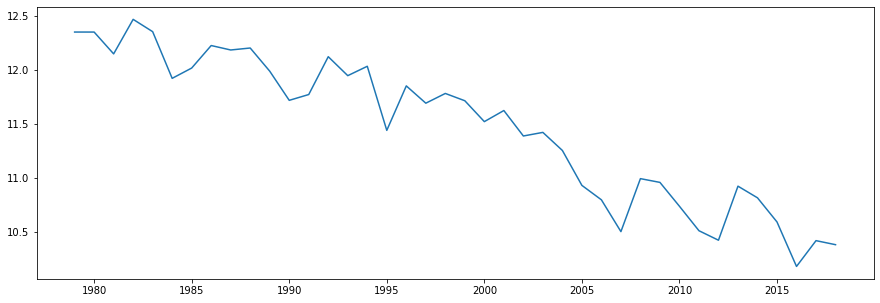

In [206]:
plt.plot(ts)

Int64Index([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year')

In [293]:
# Define train and testset
X = ts.index.values
y = ts.values
testsize = 5
size = len(ts.values)
X_train, X_test, y_train, y_test = X[:-testsize], X[-testsize:], y[:-testsize], y[-testsize:]

### Cross validation setup

In [208]:
tscv = TimeSeriesSplit(max_train_size=30, n_splits=20)

In [209]:
tscv.split(X)

<generator object TimeSeriesSplit.split at 0x000002004B5B90C8>

In [210]:
for train_index, test_index in tscv.split(X):
    print(train_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19

In [211]:
# cross_val_score(knn, X_train, y_train, cv=tss , scoring='accuracy')

In [212]:
ts = ts.squeeze()

In [213]:
ts

Year
1979    12.349634
1980    12.349545
1981    12.147230
1982    12.467336
1983    12.353095
1984    11.920382
1985    12.015835
1986    12.224548
1987    12.183318
1988    12.201616
1989    11.986788
1990    11.716385
1991    11.770302
1992    12.121065
1993    11.945254
1994    12.032209
1995    11.437963
1996    11.850327
1997    11.689949
1998    11.780257
1999    11.712603
2000    11.518993
2001    11.621888
2002    11.385820
2003    11.419148
2004    11.251586
2005    10.927786
2006    10.793886
2007    10.499133
2008    10.990294
2009    10.955518
2010    10.734207
2011    10.507405
2012    10.419335
2013    10.920494
2014    10.812470
2015    10.588599
2016    10.176126
2017    10.415373
2018    10.377886
Name: ice_extent, dtype: float64

### Define testing methods

In [214]:
def calc_rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100

### ARIMA

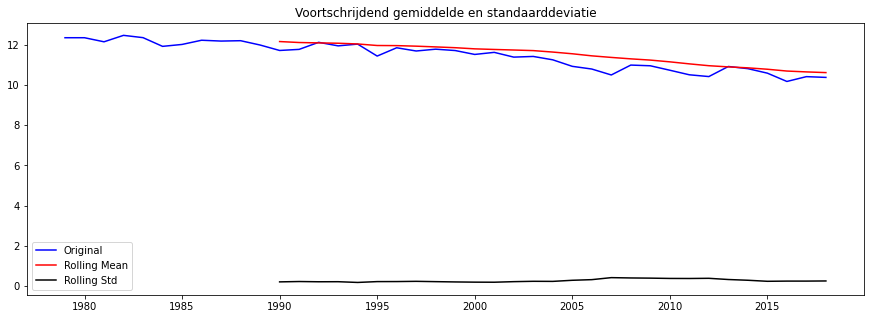

In [215]:
# # We check how stationary a dataset is first because most models assume that datasets are stationary
# # Stationarity is very strictly defined but for this practical example we can assume the time series is stationary
# # if we have a constant mean and variance

# def test_stationarity(timeseries):
    
#     # Determing rolling statistics
#     rolmean = timeseries.rolling(12).mean()
#     rolstd = timeseries.rolling(12).std()

#     # Plot rolling statistics:
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Voortschrijdend gemiddelde en standaarddeviatie')
#     plt.show(block=False)
    
# test_stationarity(ts)

Hier zien we een licht dalende trend in de waarden, dit geeft weer dat de tijdreeks niet stationair is. Om dit te verhelpen kunnen we het voorschrijdend gemiddelde aftrekken van de originele reeks.

#### Differentiëren t.o.v. voortschrijdend gemiddelde

In [216]:
# # We can calculate the difference between the original values and the moving average to make the data more stationary
# moving_avg = ts.rolling(5).mean()
# ts_moving_avg_diff = ts - moving_avg
# ts_moving_avg_diff.head(10)

Year
1979         NaN
1980         NaN
1981         NaN
1982         NaN
1983    0.019727
1984   -0.327135
1985   -0.164941
1986    0.028309
1987    0.043883
1988    0.092476
Name: ice_extent, dtype: float64

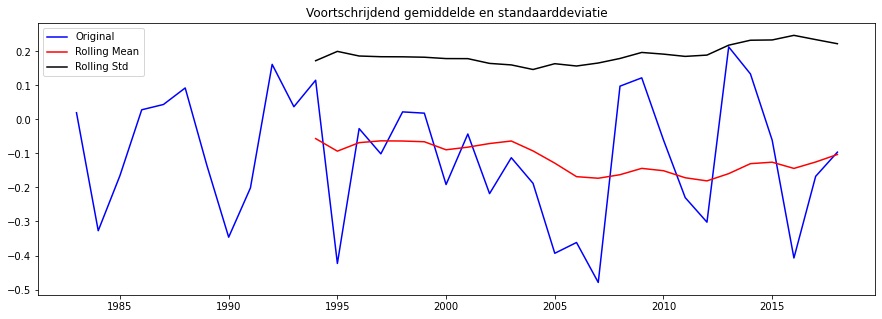

In [217]:
# ts_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_moving_avg_diff)

Na het verschil te nemen van de originele tijdreeks en het voortschrijdend gemiddelde kan opgemerkt worden dat de dalende trend niet meer aanwezig is.

#### Differentiëren t.o.v. vorige tijdstap

De stationariteit kan nog verbeterd worden wanneer we gaan differentiëren t.o.v. de vorige tijdstappen

Year
1979         NaN
1980   -0.000089
1981   -0.202316
1982    0.320107
1983   -0.114241
Name: ice_extent, dtype: float64


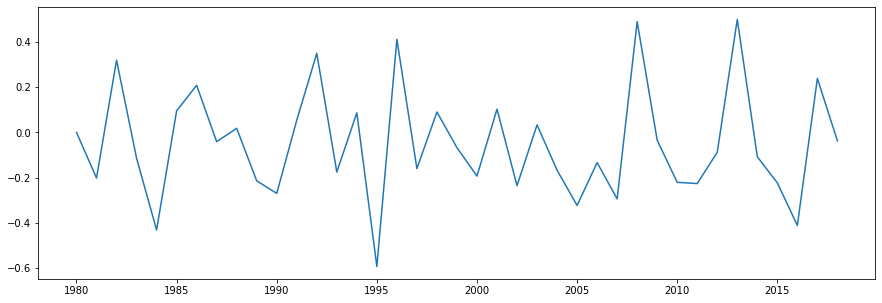

In [219]:
# # ts.shift(1) return the previous value in the series
# ts_diff = ts - ts.shift(1)  
# print(ts_diff.head())
# plt.plot(ts_diff)

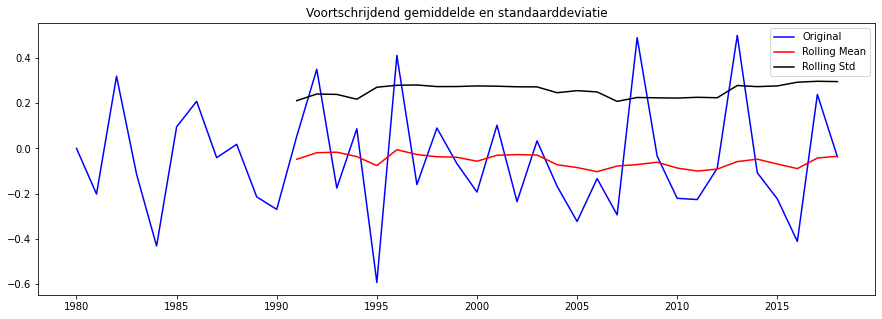

In [220]:
# # subtracting from previous values causes NaN-values at the beginning
# ts_diff.dropna(inplace=True)  
# test_stationarity(ts_diff)

Nu kunnen we stellen dat dit een stationaire tijdreeks is

#### Fitting ARIMA model

Now we can fit the time series to our ARIMA model

In [377]:
ts_clean = ts.dropna().reset_index().drop(columns=['Year']).squeeze()

In [348]:
tscv = TimeSeriesSplit(n_splits = 10)

In [349]:
for train_index, test_index in tscv.split(ts_og_clean):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0 1 2 3 4 5 6 7 8 9] TEST: [10 11 12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [16 17 18]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] TEST: [19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24] TEST: [25 26 27]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27] TEST: [28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33] TEST: [34 35 36]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [37 38 39]


In [288]:
# from sklearn.metrics import mean_absolute_error
# import itertools
# import warnings
# import sys
# # X = ts.values
# # size = int(len(X) * 0.66)
# # train, test = X[0:size], X[size:len(X)]


# # Define the p, d and q parameters to take any value between 0 and 2
# p = d = q = range(0, 2)

# # Generate all different combinations of p, q and q triplets
# pdq = list(itertools.product(p, d, q))
# best_pdq = pdq
# best_mae_mean = np.inf
# # warnings.filterwarnings("ignore") # specify to ignore warning messages

# for param in pdq:
# #   history = [x for x in train]
#     predictions = list()
#     mae = np.inf
#     print(param)
# #   try:   # some parametercombinations might lead to crash, so catch exceptions and continue
#     for train_index, test_index in tscv.split(ts_clean):
#         cv_train, cv_test = ts_clean.iloc[train_index], ts_clean.iloc[test_index]

#         arima = sm.tsa.ARIMA(cv_train, param).fit(disp=False)

#         predictions = arima.predict(cv_test.index.values[0], cv_test.index.values[-1])
#         true_values = cv_test.values
#         mae.append(sqrt(mean_absolute_error(true_values, predictions)))
#     mae_mean = np.mean(mae)
#     print("MAE: {}".format(mae_mean))
#     if mae_mean < best_mae_mean:
#         best_mae_mean = mae_mean
#         best_pdq = param
#         best_predictions = predictions
# #     except Exception as e:
# #         print(e)
# #         continue
        
# # plot
# print()

# print('Best MAE = ' + str(best_mae_mean))
# print(best_pdq)
# plt.show()

In [ ]:
# ts_moving_avg_diff.dropna(inplace=True)
# test_stationarity(ts_moving_avg_diff)

In [ ]:
# # ts.shift(1) return the previous value in the series
# ts_diff = ts - ts.shift(1)  
# print(ts_diff.head())
# plt.plot(ts_diff)

In [311]:
y_train_stat

30

In [317]:
y_train1, y_train2 = y_train[:-5], y_train[-5:]
X_train1, X_train2 = X_train[:-5], X_train[-5:]

In [366]:
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
import sys
# X = ts.values
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]


# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
best_pdq = pdq
best_mae = np.inf
# warnings.filterwarnings("ignore") # specify to ignore warning messages


for param in pdq:
#   history = [x for x in train]
    predictions = list()
    mae = np.inf
    print(param)
    try:   # some parametercombinations might lead to crash, so catch exceptions and continue
            
        arima = sm.tsa.ARIMA(y_train1, param).fit(disp=False)

        predictions = arima.forecast(steps=5)
        true_values = y_train2
        mean_absolute_error(true_values, predictions[0])
        mae = mean_absolute_error(true_values, predictions[0])
        print("MAE: {}".format(mae))
        if mae < best_mae:
            best_mae = mae
            best_pdq = param
            best_predictions = predictions
    except Exception as e:
        print(e)
        continue

# plot
print()

print('Best MAE = ' + str(best_mae))
print(best_pdq)
plt.show()

(0, 0, 0)
MAE: 1.048080529469732
(0, 0, 1)
MAE: 1.023593260834177
(0, 1, 0)
MAE: 0.21294760266329077
(0, 1, 1)
MAE: 0.18418707496518322
(1, 0, 0)
MAE: 0.49563699077021434
(1, 0, 1)
MAE: 0.2798007014188041
(1, 1, 0)
MAE: 0.1951146470656319
(1, 1, 1)
MAE: 0.21560438876307267

Best MAE = 0.18418707496518322
(0, 1, 1)


In [372]:
# (9, 1, 8)

(9, 1, 8)

In [350]:
# tscv = TimeSeriesSplit(n_splits = 10)

In [362]:
# best_pdq = (9, 1, 8)

In [378]:
from sklearn.metrics import mean_absolute_error
import itertools
import warnings
import sys

maes = []

for train_index, test_index in tscv.split(ts_clean):
    cv_train, cv_test = ts_clean.iloc[train_index], ts_clean.iloc[test_index]

    arima = sm.tsa.ARIMA(cv_train, best_pdq).fit(disp=False)

    predictions = arima.forecast(steps=3)
    true_values = cv_test.values
    maes.append(mean_absolute_error(true_values, predictions[0]))
    
mae_mean = np.mean(maes)
print("MAE: {}".format(mae_mean))

MAE: 0.2199121587883474


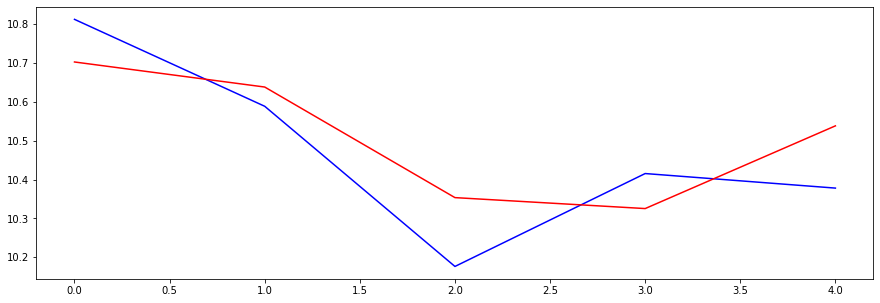

In [210]:
# # plot
# plt.plot(test,color='blue')
# plt.plot(predictions, color='red')
# plt.show()

In [221]:
# # we split the trainingsset to get the parametercombination with the best result
# train1 = train[:-5]
# train2 = train[-5:]

In [227]:
# predictions = list()
# history = [x for x in train]

# for t in range(len(test)):
#     model = ARIMA(history, order=(8, 1, 3))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yt = output[0]
#     predictions.append(yt)
#     obs = test[t]
#     history.append(yt)
# r2_ARIMA = r2_score(test,predictions)
# predictions_ARIMA = predictions
# rmspe_ARIMA = calc_rmspe(test, predictions)

In [379]:
predictions[0]

array([10.54768096, 10.49782371, 10.44796646])

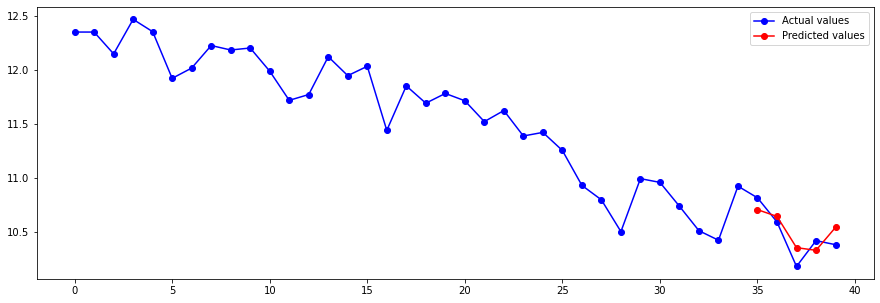

In [356]:
def full_graph(predicted):
    predictionsArray = np.asarray(predicted).reshape(testsize) 
    zerosArray = np.zeros(tsuv.values.size-len(predictionsArray.flatten()))
    cleanPrediction = pd.Series(np.concatenate((zerosArray,predictionsArray))).replace(0,np.NaN)

    # plot
    plt.plot(tsuv.values,marker='o', color='blue',label='Actual values')
    plt.plot(cleanPrediction,marker='o', color='red',label='Predicted values')
    plt.legend()

    plt.show()
full_graph(predictions_ARIMA)

### LSTM

In [96]:
# Fit data to LSTM multi step prediction because this is a chained one step prediction

In [97]:

# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

[[102.43126]]


In [236]:
import numpy as np

# univariate multi-step encoder-decoder convlstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D

def calc_rmspe(y_true, y_pred):
    return np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100

def monitor(name, variable):
    print(name)
    print(type(variable))
    print(variable)
    print()

# split a univariate dataset into train/test sets
def split_dataset(train, test):
    # restructure into windows of yearly data
    train_split = array(split(train, len(train)/5))
    test_split = array(split(test, len(test)/5))
    return train_split, test_split

# evaluate one or more weekly forecasts against expected values
# MABEY?
# def evaluate_forecasts(actual, predicted):
#     monitor("Actual", actual)
#     monitor("Predicted",predicted)
#     print()
    
    
#     scores = list()
#     # calculate an RMSE score for each day
#     for i in range(actual.shape[1]):
#         # calculate rmspe
#         rmspe = calc_rmspe(actual[:, i], predicted[:, i])
#         # store
#         scores.append(rmspe)
        
# #     # calculate overall RMSE
# #     s = 0
# #     for row in range(actual.shape[0]):
# #         for col in range(actual.shape[1]):
# #             s += (actual[row, col] - predicted[row, col])**2
#     score = calc_rmspe(actual.flatten(),predicted.flatten())
#     return score, scores

# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=5):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            x_input = data[in_start:in_end]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end])
        # move along one time step
        in_start += 1
    return array(X), array(y)

# train the model
def build_model(train, n_steps, n_length, n_input):
    # prepare data
    train_x, train_y = to_supervised(train, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 20, 5
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # reshape into subsequences [samples, time steps, rows, cols, channels]
    train_x = train_x.reshape((train_x.shape[0], n_steps, 1, n_length, n_features))
    # reshape output into [samples, timesteps, features]
    train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))

    # define model
    model = Sequential()
    model.add(ConvLSTM2D(filters=64, kernel_size=(1,3), activation='relu', input_shape=(n_steps, 1, n_length, n_features)))
    model.add(Flatten())
    model.add(RepeatVector(n_outputs))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(100, activation='relu')))
    model.add(TimeDistributed(Dense(1)))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # plot history
    pyplot.title('Error per epoch')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.legend()
    pyplot.show()
    return model

# make a forecast
def forecast(model, history, n_steps, n_length, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1]))
    # retrieve last observations for input data
    input_x = data[-n_input:]
    # reshape into [samples, time steps, rows, cols, channels]
    input_x = input_x.reshape((1, n_steps, 1, n_length, 1))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

# evaluate a single model
def evaluate_model(train, test, n_steps, n_length, n_input):
    # fit model
    model = build_model(train, n_steps, n_length, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_steps, n_length, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    score = calc_rmspe(test[:, :].flatten(), predictions.flatten()) #evaluate_forecasts(test[:, :, 0], predictions)
    X = range(0,5)
    pyplot.title('Comparing actual results with predictions')
    pyplot.plot(X, test[:, :].flatten(), marker='o', label='Actual')
    pyplot.plot(X, predictions.flatten(), marker='o', label='Predictions')
    pyplot.legend()
    pyplot.show()
    return score, r2_score(test[:, :].flatten(), predictions.flatten()), predictions

In [237]:
r2_LSTM

-6.160651303485519

In [238]:
train

array([[12.34963423],
       [12.34954524],
       [12.14722956],
       [12.46733611],
       [12.35309489],
       [11.92038229],
       [12.01583487],
       [12.22454816],
       [12.18331848],
       [12.20161571],
       [11.98678792],
       [11.71638515],
       [11.77030227],
       [12.12106516],
       [11.94525384],
       [12.03220944],
       [11.43796255],
       [11.85032685],
       [11.68994904],
       [11.78025734],
       [11.71260265],
       [11.51899337],
       [11.62188762],
       [11.38581964],
       [11.41914775],
       [11.25158582],
       [10.92778639],
       [10.79388555],
       [10.49913293],
       [10.99029426],
       [10.95551848],
       [10.7342074 ],
       [10.50740513],
       [10.41933483],
       [10.92049402]])

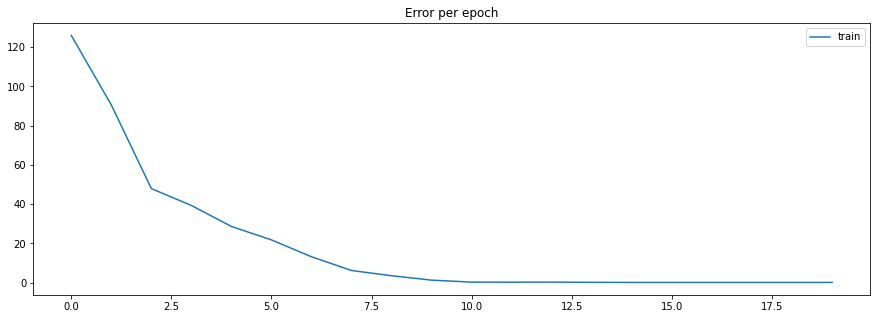

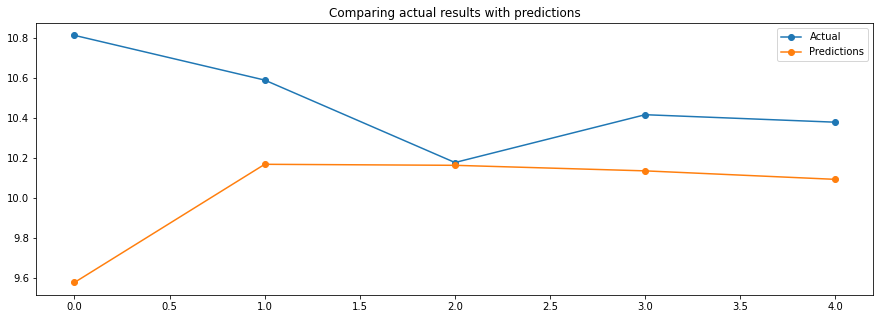

In [243]:
# split into train and test
train_lstm, test_lstm = split_dataset(train, test)

# define the number of subsequences and the length of subsequences
n_steps, n_length = 1, 5

# define the total days to use as input
n_input = n_length * n_steps
rmspe_LSTM, r2_LSTM, predictions = evaluate_model(train_lstm, test_lstm, n_steps, n_length, n_input)

In [244]:
r2_LSTM

-7.151630637087409

In [245]:
rmspe_LSTM

5.683586289129378

In [247]:
predictions_LSTM = predictions

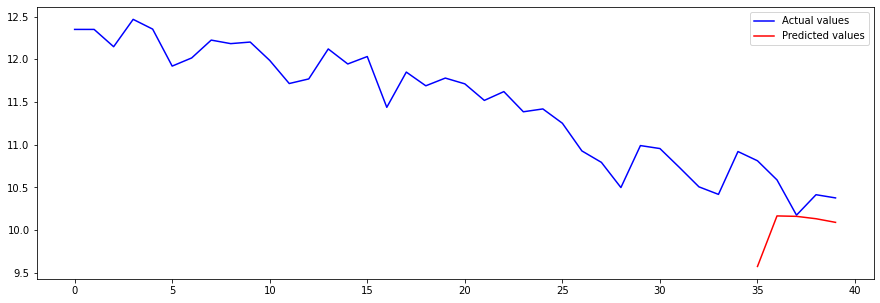

In [248]:
full_graph(predictions_LSTM)

### Polynomiale Regressie

In [249]:
ts

Year
1979    12.349634
1980    12.349545
1981    12.147230
1982    12.467336
1983    12.353095
1984    11.920382
1985    12.015835
1986    12.224548
1987    12.183318
1988    12.201616
1989    11.986788
1990    11.716385
1991    11.770302
1992    12.121065
1993    11.945254
1994    12.032209
1995    11.437963
1996    11.850327
1997    11.689949
1998    11.780257
1999    11.712603
2000    11.518993
2001    11.621888
2002    11.385820
2003    11.419148
2004    11.251586
2005    10.927786
2006    10.793886
2007    10.499133
2008    10.990294
2009    10.955518
2010    10.734207
2011    10.507405
2012    10.419335
2013    10.920494
2014    10.812470
2015    10.588599
2016    10.176126
2017    10.415373
2018    10.377886
Name: ice_extent, dtype: float64

In [277]:
X_train = ts.index.values[:-testsize]
X_test = ts.index.values[-testsize:]

In [278]:
y_train = train
y_test = test

In [279]:
ts.values

array([12.34963423, 12.34954524, 12.14722956, 12.46733611, 12.35309489,
       11.92038229, 12.01583487, 12.22454816, 12.18331848, 12.20161571,
       11.98678792, 11.71638515, 11.77030227, 12.12106516, 11.94525384,
       12.03220944, 11.43796255, 11.85032685, 11.68994904, 11.78025734,
       11.71260265, 11.51899337, 11.62188762, 11.38581964, 11.41914775,
       11.25158582, 10.92778639, 10.79388555, 10.49913293, 10.99029426,
       10.95551848, 10.7342074 , 10.50740513, 10.41933483, 10.92049402,
       10.81246966, 10.58859927, 10.17612621, 10.41537335, 10.37788625])

In [293]:
# Create an array with ints to provide index/y values

X_train = pd.DataFrame(range(0,ts.shape[0]))[:-testsize]
X_test = pd.DataFrame(range(0,ts.shape[0]))[-testsize:]

# y_train = ts.reset_index().drop(columns='Date').squeeze()[:-testsize]
# y_test = ts.reset_index().drop(columns='Date').squeeze()[-testsize:]

In [306]:
X_test

,0
35,35
36,36
37,37
38,38
39,39


In [294]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Prepare variables that keep track of the best fitting polynomial
BestR2 = -float('inf')
BestRMSPE = float('inf')
BestIR2 = 1
BestIRMSPE = 1



# Loop over polynomials from degrees 1 to 10 and use polynomial that fits best according to the 
for i in range(1,10):
    
    # Create PolynomialFeatures from the first degree
    poly = PolynomialFeatures(degree=i)
    
    # Fit the inputdata from your trainingsset to the polynomial
    X_train_transform = poly.fit_transform(X_train)
    
    # Create the model and fit it to the transformed inputdata and your expected outputdata from the trainingsdata
    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    # Transform the inputdata from your 
    X_test_transform = poly.fit_transform(X_test)
    y_predict_test = model.predict(X_test_transform)    
    
    # Calculate errors
    RMSPE_test = calc_rmspe(y_test, y_predict_test)

    # Print errors
    print('RMSPE for i = ' + str(i) + ' is ' + str(RMSPE_test) )
    print()
    
    # Update best fit
    if BestRMSPE > RMSPE_test:
        BestRMSPE = RMSPE_test
        BestRMSPEi = i
        
# Conclude best results
# print('Best i value according to r2 is '+str(BestR2i)+' with r2: '+str(BestR2))
print('Best i value according to RMSPE is '+str(BestRMSPEi)+' with RMSPE: '+str(BestRMSPE))

RMSPE for i = 1 is [1.72131683]

RMSPE for i = 2 is [3.08103542]

RMSPE for i = 3 is [2.49443374]

RMSPE for i = 4 is [5.64273931]

RMSPE for i = 5 is [16.00138567]

RMSPE for i = 6 is [17.8779239]

RMSPE for i = 7 is [11.49018218]

RMSPE for i = 8 is [25.88892094]

RMSPE for i = 9 is [173.89202755]

Best i value according to RMSPE is 1 with RMSPE: [1.72131683]


In [295]:
# Recreate best model
poly = PolynomialFeatures(degree=BestRMSPEi)
X_train_transform = poly.fit_transform(X_train)   
X_test_transform = poly.fit_transform(X_test)
model = LinearRegression()
model.fit(X_train_transform,y_train)
y_predict = model.predict(X_test_transform)

In [353]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_ + model.coef_[0][1] * x 
#     for i in range(0, len(model.coef_)):
#         result += model.coef_[i] * x 
    return result

In [330]:
t1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [341]:
model.coef_

array([[ 0.        , -0.05415041]])

In [347]:
p(t1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

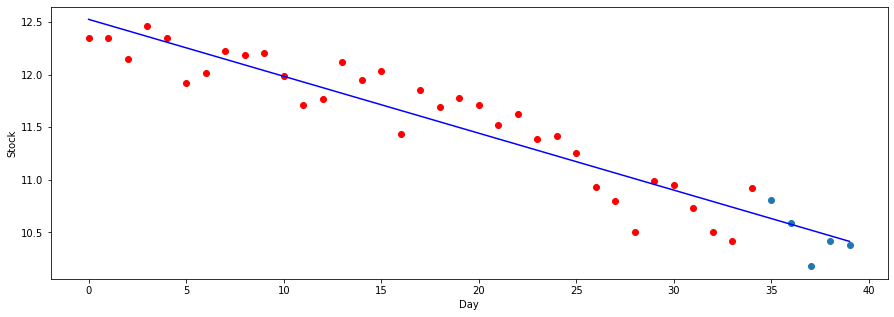

In [357]:
# Plot the dataset
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train, color='red')
plt.xlabel('Day')
plt.ylabel('Stock')

# Plot the polynomial
t1 = np.arange(0, 40, 1)
plt.plot(t1, p(t1.flatten()), color='blue')
plt.show()


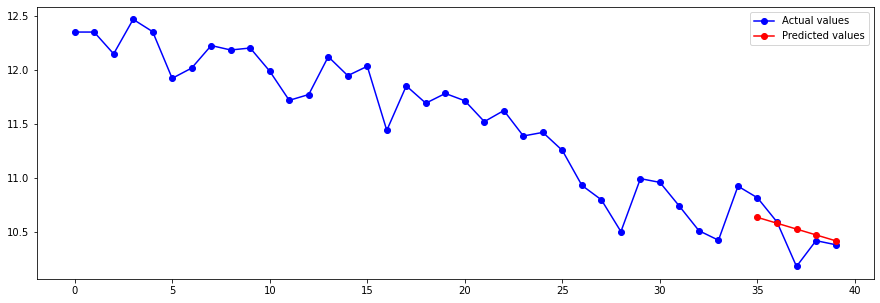

1.7213168268915489

In [358]:
full_graph(y_predict)
rmspe_PR[0]

### Evaluation

In [100]:
print('ARIMA rmspe:\t %.3f' % rmspe_ARIMA)
print('ARIMA r2:\t %.3f' % r2_ARIMA)
print()
print('LSTM rmspe:\t %.3f' % rmspe_LSTM)
print('LSTM r2:\t %.3f' % r2_LSTM)
print()
print('PR rmspe:\t %.3f' % rmspe_PR)
print('PR r2:\t\t %.3f' % r2_PR)

ARIMA rmspe:	 8.151
ARIMA r2:	 0.410

LSTM rmspe:	 14.866
LSTM r2:	 -0.803

PR rmspe:	 6.684
PR r2:		 0.592
